## Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Reading Dataset

In [2]:
train = pd.read_csv("Datasets\Train.csv")
test = pd.read_csv("Datasets\Test.csv")

## Data Visualization and Preprocessing

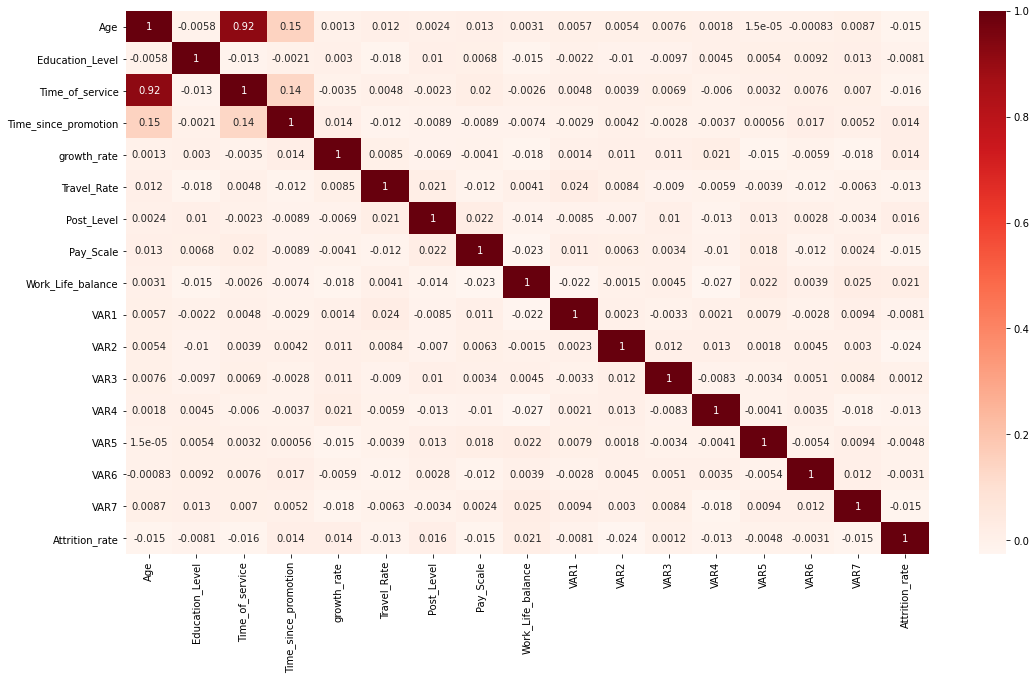

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Labels and Features

In [4]:
label = ["Attrition_rate"]
features = ['VAR7','VAR6','VAR5','VAR1','VAR3','growth_rate','Time_of_service','Time_since_promotion','Travel_Rate','Post_Level','Education_Level']

In [5]:
featured_data = train.loc[:,features+label]
featured_data = featured_data.dropna(axis=0)
featured_data.shape

(6856, 12)

In [6]:
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

### Splitting the Dataset

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.55)

## Learning Model

In [118]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
df = Ridge(alpha=0.000001)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
c=[]
for i in range(len(y_pred)):
    c.append((y_pred[i][0].round(5)))
pf=c[:3000]

print(len(c),len(pf),c[0])

3771 3000 0.18662


### Data Preprocessing Test file

In [119]:
selected_test = test.loc[:,features]
#selected_test.info()
mean_values = np.mean(selected_test)
selected_test[features].replace(mean_values,np.nan,inplace=True)
for i,val in enumerate(features):
    selected_test[val] = selected_test[val].fillna(mean_values[i])
    
selected_test

,VAR7,VAR6,VAR5,VAR1,VAR3,growth_rate,Time_of_service,Time_since_promotion,Travel_Rate,Post_Level,Education_Level
0,4,8,1,3,-0.4537,30,7.0,4,1,5,5
1,2,8,2,4,0.7075,72,41.0,2,1,1,2
2,3,9,1,4,0.7075,25,21.0,3,0,1,3
3,3,8,2,3,0.7075,28,11.0,4,1,1,5
4,4,7,2,4,0.7075,47,12.0,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
2995,4,7,4,1,0.7075,38,3.0,3,1,3,3
2996,3,8,4,3,0.7075,57,10.0,2,1,4,2
2997,4,8,4,3,-0.4537,69,35.0,1,0,2,4
2998,2,9,3,5,-0.4537,30,23.0,1,0,2,1


## Prediction

In [120]:
#Predicting
import pandas as pd
dff = pd.DataFrame({'Employee_ID':test['Employee_ID'],'Attrition_rate':pf})
#Converting to CSV
dff.to_csv("Predictions.csv",index=False)